# utils

> Some utilities to visualize graph

In [ ]:
#|default_exp utils

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
from fastcore.utils import L
import pathlib
import os

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
#| export
from fastcore.utils import store_attr, basic_repr

In [ ]:
class Value:
    def __init__(self, data): store_attr('data', self)
    __repr__=basic_repr('data')

In [ ]:
Value(data=1)

Value(data=1)

In [ ]:
a = Value(2.0)
b = Value(-3.0)

In [ ]:
from fastcore.utils import patch, patch_to

In [ ]:
@patch_to(Value)
def __mul__(self:Value, other): return Value(self.data*other.data)

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b

Value(data=-6.0, grad=0.0, _op='', _prev=set())

In [ ]:
class Value:
    def __init__(self, data, children=(), op=''): 
        store_attr('data', self) # Largely overkill but want to try how fastcore works
        self._prev = set(children)
        self._op = op
        self.grad = 0.0
    __repr__= basic_repr('data, grad, _op, _prev')

In [ ]:
@patch_to(Value)
def __add__(self:Value, other): return Value(self.data+other.data, children=(self, other), op="+")

@patch_to(Value)
def __mul__(self:Value, other): return Value(self.data*other.data, children=(self, other), op="*")

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b, a+b

(Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set()), Value(data=-3.0, grad=0.0, _op='', _prev=set())}),
 Value(data=-1.0, grad=0.0, _op='+', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set()), Value(data=-3.0, grad=0.0, _op='', _prev=set())}))

## Plan
- I need a good way to visualize the computational graph in solveit. Earlier I used graphviz but it's not possible in solve it. I am thinking I may use `render_ft` and svg functionality but I am open to other suggestions. 
- Earlier code
```
# %% ../nbs/01_utils.ipynb 3
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
# import graphviz
from graphviz import Digraph
from .core import Value


# %% ../nbs/01_utils.ipynb 11
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v: nodes.add(v)
        for i in v._prev:
            nodes.add(i)
            edges.add((i, v))
            build(i)
    build(root)
    return nodes, edges

# %% ../nbs/01_utils.ipynb 14
def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir":'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        # print(str(id(n)))
        uid = str(id(n))
        dot.node(uid, label=f" {{ {n.label}|{n.data:.4f}| grad: {n.grad:.4f}  }}", shape='record') # For { in f-string use {{
        if n._op:
            dot.node(uid+n._op, n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
        
    return dot
```

Help me get started 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I can help you visualize your computational graph in solveit! Since graphviz rendering won't work here, let's explore some alternatives.

A few options:

1. **matplotlib with networkx** - Draw the graph using matplotlib (which works in solveit). This would give you a visual diagram similar to graphviz.

2. **ASCII/text representation** - Create a simple text-based tree view that shows the computation structure.

3. **HTML/SVG with custom rendering** - Build SVG elements manually and display them.

Which approach interests you most? Or would you like me to show you a quick example of one of them (I'd suggest starting with matplotlib+networkx since those libraries are already available)?

Ok let's try first with networkx

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! Let's start by creating a simple visualization of your computational graph using matplotlib and networkx.

First, let's adapt your `trace` function to work with your current `Value` class, then create a basic graph visualization:

```python
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v: nodes.add(v)
        for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges
```

Try running this with one of your existing expressions (like `a*b` or the more complex ones). Once you have that working, we can add the networkx visualization part.

What would you like to visualize first?

In [ ]:
#| export
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v: nodes.add(v)
        for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

In [ ]:
import networkx as nx

def draw_graph(root):
    nodes, edges = trace(root)
    G = nx.DiGraph()
    
    for n in nodes:
        label = f"{n._op if n._op else 'val'}\n{n.data:.2f}"
        G.add_node(id(n), label=label)
    
    for n1, n2 in edges:
        G.add_edge(id(n1), id(n2))
    
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, labels=labels, node_color='lightblue', 
            node_size=2000, arrows=True, arrowsize=20)
    plt.show()

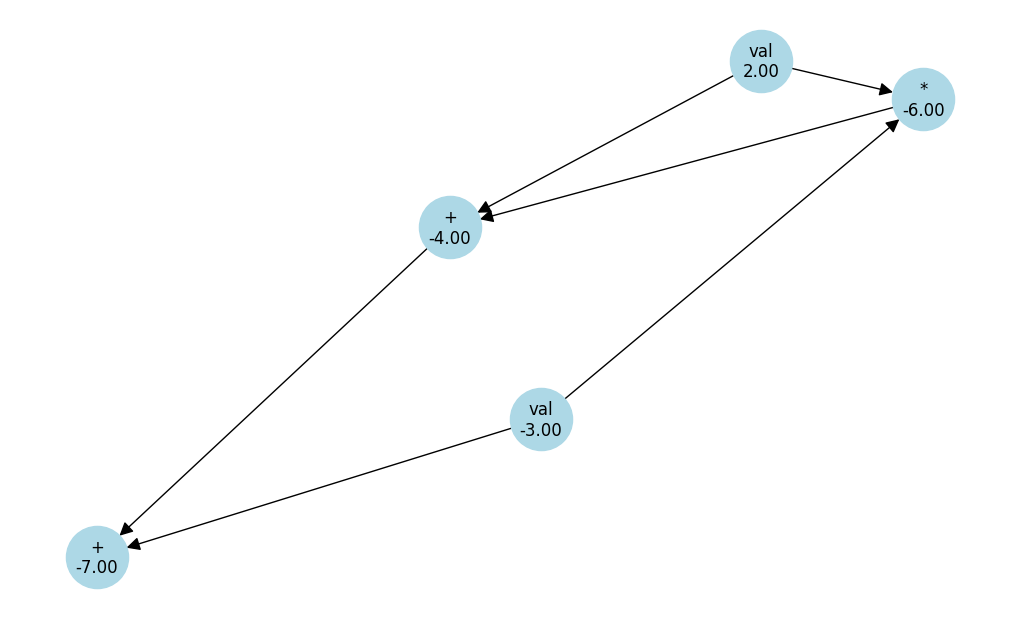

In [ ]:
c = a*b+ a+b
draw_graph(c)

I want to build something like this 
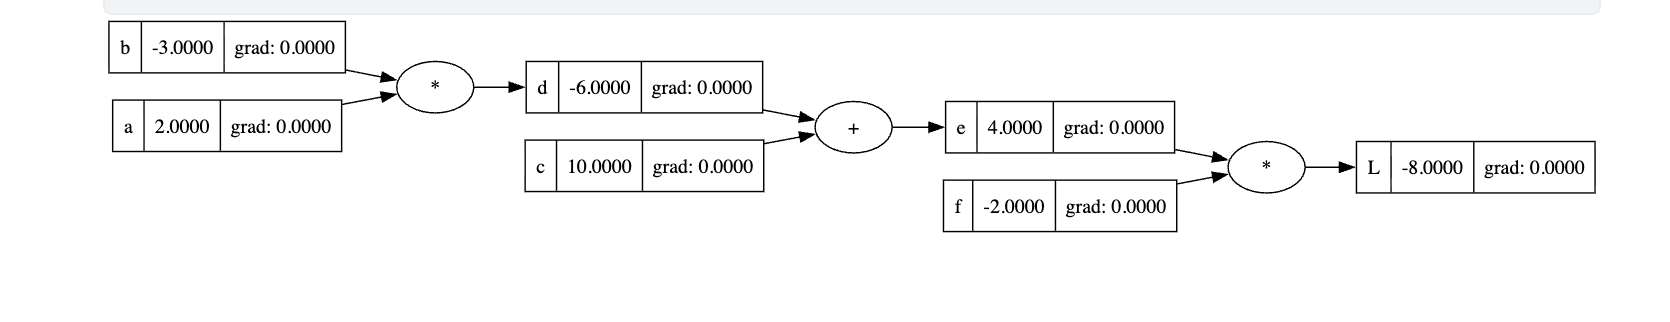


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Nice! That's a much cleaner layout than what we have now. I can see a few key differences from your current visualization:

1. **Left-to-right flow** (like a proper computational graph)
2. **Separate nodes for operations** (the circles with `*` and `+`)
3. **Rectangular boxes for values** showing the label, data, and grad
4. **Hierarchical layout** instead of spring layout

The main changes needed are:
- Use a hierarchical layout (like `nx.planar_layout` or manually position nodes by layer)
- Create separate nodes for operations (not just the Value nodes)
- Draw rectangles for values and circles for operations
- Add the labels with data and grad information

Would you like to tackle this step-by-step, or would you prefer me to write the complete function for you?

Please write the code for me

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a complete function to create that style of visualization:

```python
def draw_graph(root):
    nodes, edges = trace(root)
    G = nx.DiGraph()
    
    # Add nodes for values and operations
    for n in nodes:
        uid = id(n)
        G.add_node(uid, type='value', value=n)
        if n._op:
            op_uid = f"{uid}_op"
            G.add_node(op_uid, type='op', op=n._op)
            G.add_edge(op_uid, uid)
    
    # Add edges from children to operations
    for n1, n2 in edges:
        if n2._op:
            G.add_edge(id(n1), f"{id(n2)}_op")
    
    # Use hierarchical layout
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Draw operation nodes (circles)
    op_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'op']
    nx.draw_networkx_nodes(G, pos, nodelist=op_nodes, node_shape='o', 
                          node_color='white', edgecolors='black', 
                          node_size=800, ax=ax)
    for node in op_nodes:
        op = G.nodes[node]['op']
        x, y = pos[node]
        ax.text(x, y, op, ha='center', va='center', fontsize=12)
    
    # Draw value nodes (rectangles)
    val_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'value']
    for node in val_nodes:
        v = G.nodes[node]['value']
        x, y = pos[node]
        label = getattr(v, 'label', 'val')
        rect = plt.Rectangle((x-0.08, y-0.04), 0.16, 0.08, 
                             facecolor='white', edgecolor='black')
        ax.add_patch(rect)
        ax.text(x, y+0.015, f"{label}", ha='center', va='center', fontsize=9)
        ax.text(x, y-0.015, f"{v.data:.4f} | grad: {v.grad:.4f}", 
               ha='center', va='center', fontsize=7)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='black', 
                          arrows=True, arrowsize=15, ax=ax)
    
    ax.set_xlim(min(x for x, y in pos.values())-0.2, 
                max(x for x, y in pos.values())+0.2)
    ax.set_ylim(min(y for x, y in pos.values())-0.2, 
                max(y for x, y in pos.values())+0.2)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
```

You'll notice your `Value` class needs a `label` attribute for the node names (like 'a', 'b', 'c'). Try adding that to your `__init__` method and then test it with your expression!

In [ ]:
def draw_graph(root):
    nodes, edges = trace(root)
    G = nx.DiGraph()
    
    # Add nodes for values and operations
    for n in nodes:
        uid = id(n)
        G.add_node(uid, type='value', value=n)
        if n._op:
            op_uid = f"{uid}_op"
            G.add_node(op_uid, type='op', op=n._op)
            G.add_edge(op_uid, uid)
    
    # Add edges from children to operations
    for n1, n2 in edges:
        if n2._op:
            G.add_edge(id(n1), f"{id(n2)}_op")
    
    # Use hierarchical layout
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Draw operation nodes (circles)
    op_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'op']
    nx.draw_networkx_nodes(G, pos, nodelist=op_nodes, node_shape='o', 
                          node_color='white', edgecolors='black', 
                          node_size=800, ax=ax)
    for node in op_nodes:
        op = G.nodes[node]['op']
        x, y = pos[node]
        ax.text(x, y, op, ha='center', va='center', fontsize=12)
    
    # Draw value nodes (rectangles)
    val_nodes = [n for n, d in G.nodes(data=True) if d.get('type') == 'value']
    for node in val_nodes:
        v = G.nodes[node]['value']
        x, y = pos[node]
        label = getattr(v, 'label', 'val')
        rect = plt.Rectangle((x-0.08, y-0.04), 0.16, 0.08, 
                             facecolor='white', edgecolor='black')
        ax.add_patch(rect)
        ax.text(x, y+0.015, f"{label}", ha='center', va='center', fontsize=9)
        ax.text(x, y-0.015, f"{v.data:.4f} | grad: {v.grad:.4f}", 
               ha='center', va='center', fontsize=7)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='black', 
                          arrows=True, arrowsize=15, ax=ax)
    
    ax.set_xlim(min(x for x, y in pos.values())-0.2, 
                max(x for x, y in pos.values())+0.2)
    ax.set_ylim(min(y for x, y in pos.values())-0.2, 
                max(y for x, y in pos.values())+0.2)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

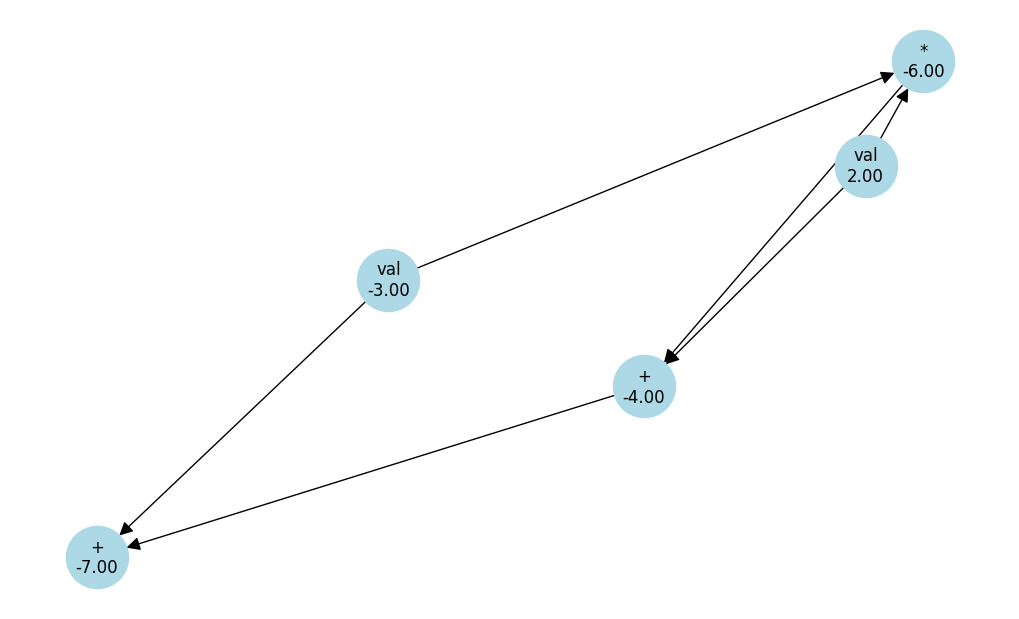

In [ ]:
draw_graph(c)

I think I should construct something manually

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good instinct! The spring layout is giving you a messy arrangement. For a clean left-to-right computational graph like your reference image, you'll want to manually position nodes by their "depth" in the computation.

The key idea is to assign each node a layer number (leaf nodes are layer 0, nodes that depend on them are layer 1, etc.), then position them based on that.

Would you like to:
1. Write a function to compute the layer/depth for each node
2. Use networkx's built-in hierarchical layout options (like `multipartite_layout`)
3. Something else?

Which approach sounds more interesting to you?
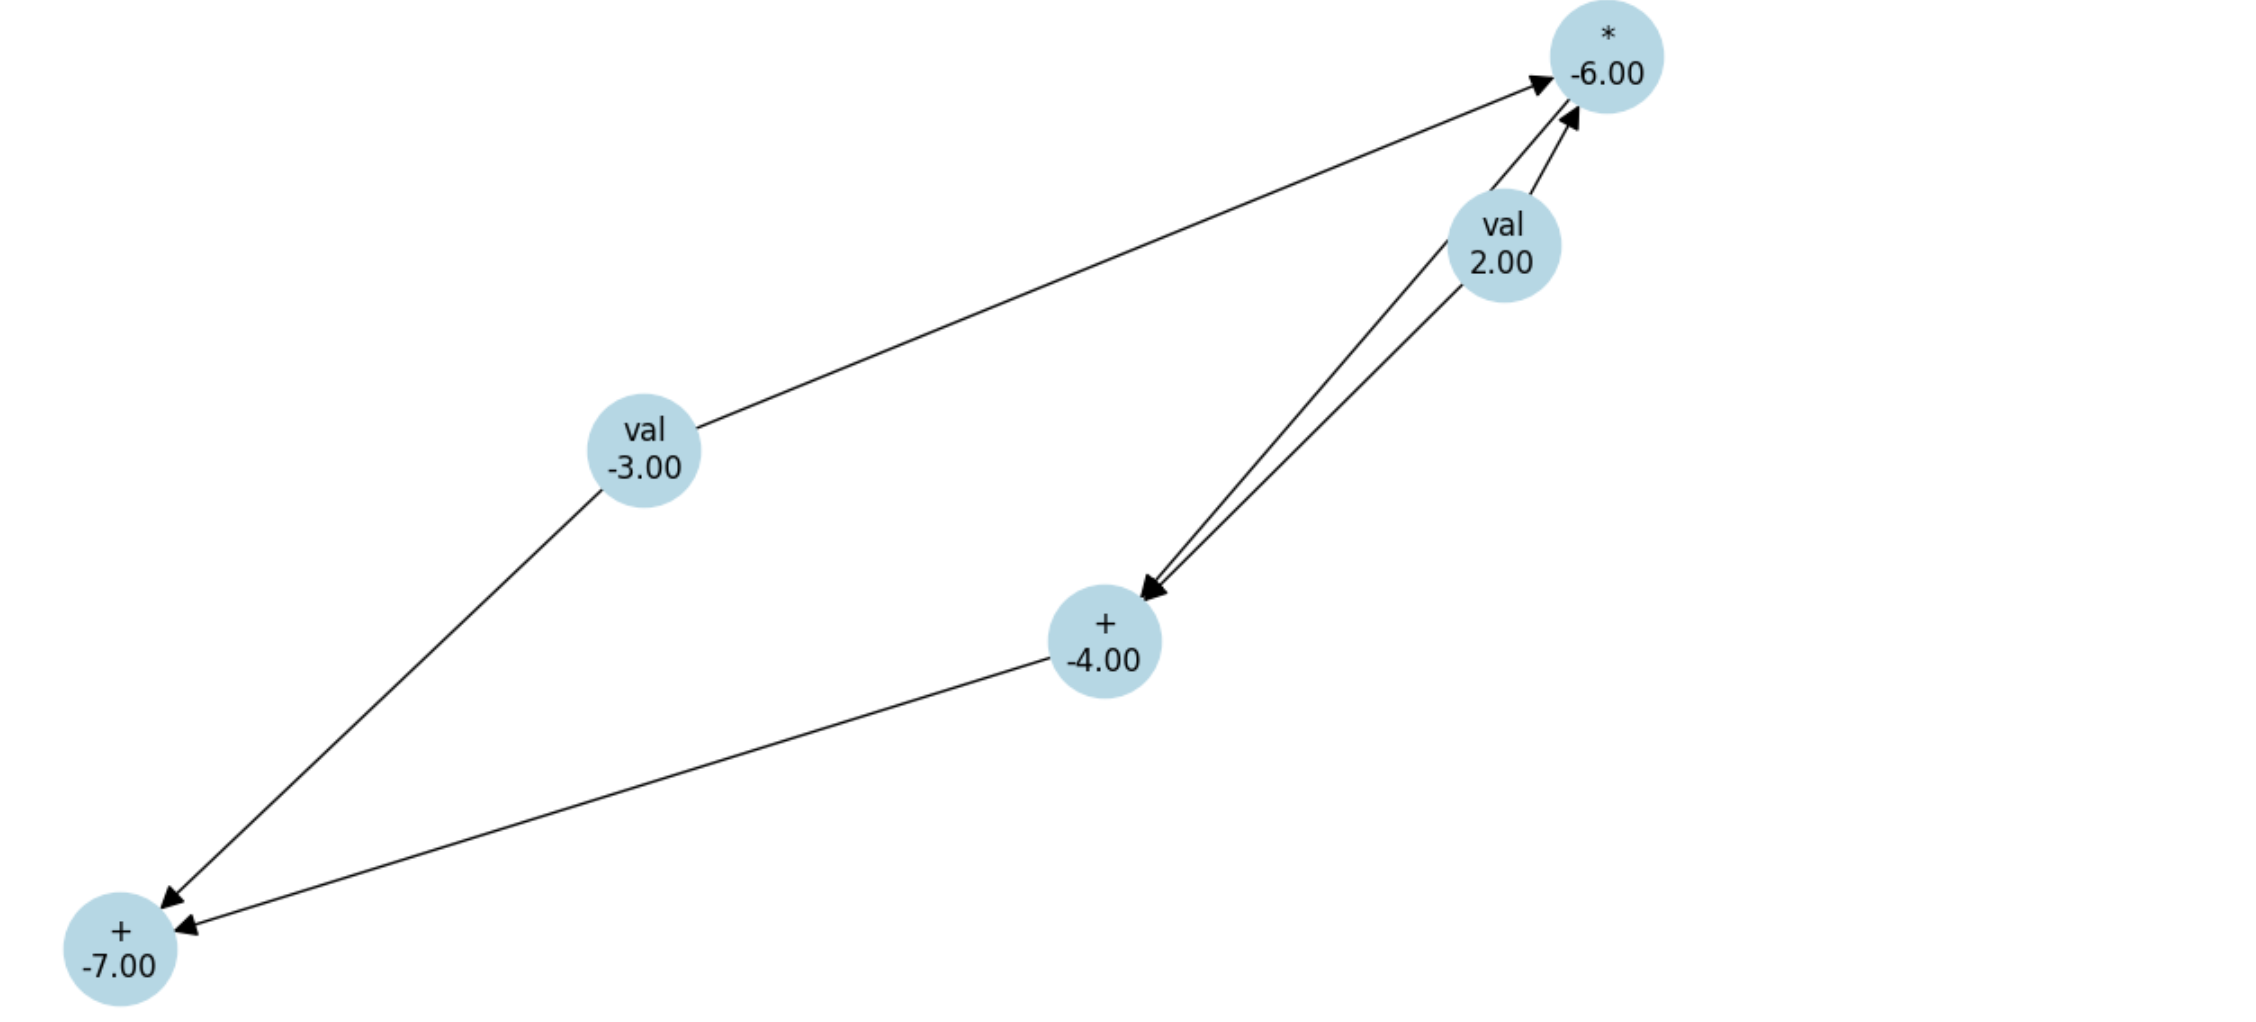
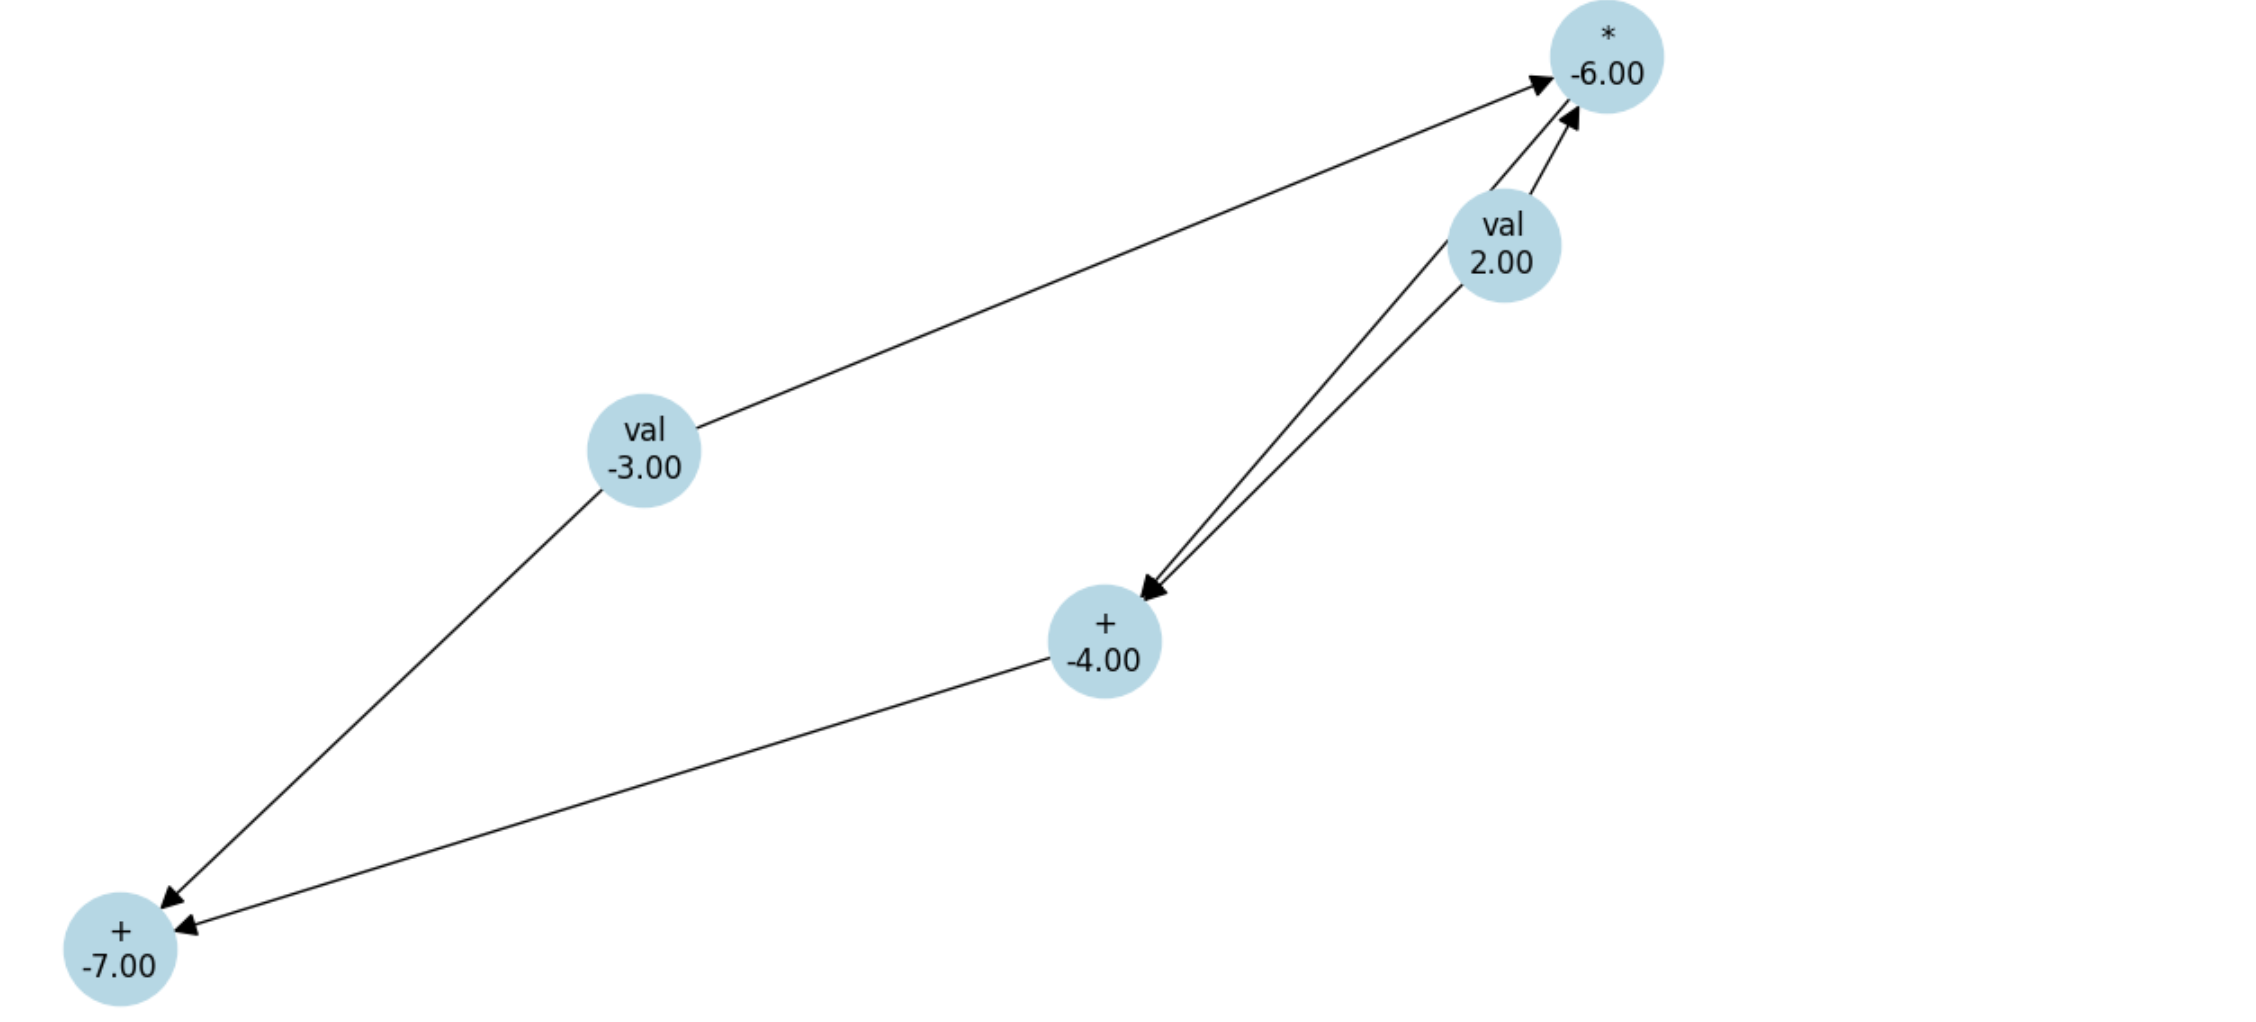

Should we try with svg ? Is there a way to use graphviz style digraph?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, you can use graphviz directly! The `graphviz` library is already installed in your solveit instance. It can generate SVG output that will display nicely.

The approach would be very similar to your old code - create a `Digraph` object, add nodes and edges, and then display it. In solveit, you can render it as SVG.

Would you like to adapt your old `draw_dot` function to work with your current `Value` class? It should be pretty straightforward since you already have the basic structure.

In [ ]:
#| export
import graphviz
from graphviz import Digraph

In [ ]:
#| export
def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir":'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        # print(str(id(n)))
        uid = str(id(n))
        dot.node(uid, label=f" {{ {n.label}|{n.data:.4f}| grad: {n.grad:.4f}  }}", shape='record') # For { in f-string use {{
        if n._op:
            dot.node(uid+n._op, n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
        
    return dot

In [ ]:
draw_dot(c)

AttributeError: 'Value' object has no attribute 'label'

How to get label from variable name?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You need to add a `label` attribute to your `Value` class. The tricky part is that Python doesn't automatically know what variable name you assigned to an object.

You have a few options:

1. **Pass the label explicitly** when creating a `Value`:
   ```python
   a = Value(2.0, label='a')
   ```

2. **Use a default label** (like 'val') and only set it when you need it:
   ```python
   a = Value(2.0)
   a.label = 'a'
   ```

3. **Modify `draw_dot`** to use a fallback when there's no label (like you did with `getattr` in the matplotlib version)

Which approach would you prefer? The first option is cleanest if you're okay with adding labels when you create values.

Can it auto assign if label not provided?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! You can make the label optional and auto-generate one if not provided. Here's how you could modify your `Value.__init__`:

```python
def __init__(self, data, children=(), op='', label=None): 
    store_attr('data', self)
    self._prev = set(children)
    self._op = op
    self.grad = 0.0
    self.label = label if label is not None else ''
```

This way, if you don't provide a label, it defaults to an empty string. Then in `draw_dot`, you could display the empty string or show something like the operation or just the data.

Does this approach work for what you need?

In [ ]:
class Value:
    def __init__(self, data, children=(), op='', label=None): 
        store_attr('data', self) # Largely overkill but want to try how fastcore works
        self._prev = set(children)
        self._op = op
        self.grad = 0.0
        self.label = label if label is not None else ''
    __repr__= basic_repr('data, grad, _op, _prev, label')

@patch_to(Value)
def __add__(self:Value, other): return Value(self.data+other.data, children=(self, other), op="+")

@patch_to(Value)
def __mul__(self:Value, other): return Value(self.data*other.data, children=(self, other), op="*")


In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b, a+b
c = a*b+a+b; c

Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')

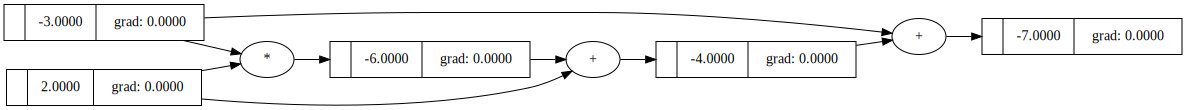

In [ ]:
draw_dot(c)

In [ ]:
@patch_to(Value)
def __repr_html__(self:Value): return draw_dot(self)

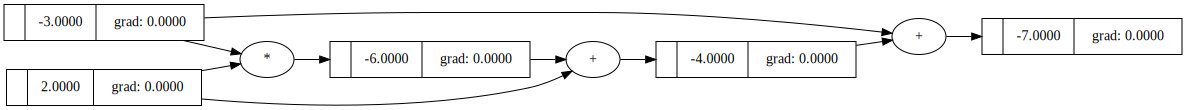

In [ ]:
c.render()

In [ ]:
c

/usr/local/lib/python3.12/site-packages/IPython/core/formatters.py:429: FormatterWarning: text/html formatter returned invalid type <class 'graphviz.graphs.Digraph'> (expected <class 'str'>) for object: Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')
  warnings.warn(


Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')

Can I make it part of default rendering in notebook

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! The `__repr_html__` method you added is the right approach for Jupyter/IPython rendering. The issue is it needs to return a string (HTML or SVG), not a Digraph object.

Try this instead:

```python
@patch_to(Value)
def __repr_html__(self:Value): 
    return draw_dot(self)._repr_svg_()
```

The `_repr_svg_()` method on the Digraph object returns the actual SVG string that Jupyter can display.

Test it by just typing `c` in a cell!

In [ ]:
@patch_to(Value)
def __repr_html__(self:Value): return draw_dot(self)._repr_svg_()

In [ ]:
c

Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b, a+b
c = a*b+a+b; c

/usr/local/lib/python3.12/site-packages/IPython/core/formatters.py:429: FormatterWarning: text/html formatter returned invalid type <class 'graphviz.graphs.Digraph'> (expected <class 'str'>) for object: Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label='')
  warnings.warn(


Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label='')

It's not rendering in solveit what to do ?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The issue is that `_repr_svg_()` returns the SVG as a string, but solveit might need it wrapped in HTML. Try this:

```python
@patch_to(Value)
def __repr_html__(self:Value): 
    return draw_dot(self)._repr_image_svg_xml()
```

Or alternatively:

```python
@patch_to(Value)
def _repr_svg_(self:Value): 
    return draw_dot(self)._repr_svg_()
```

The second option uses `_repr_svg_` instead of `__repr_html__`. Try both and see which one works in solveit!

In [ ]:
@patch_to(Value)
def __repr_html__(self:Value): 
    return draw_dot(self)._repr_image_svg_xml()

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b, a+b
c = a*b+a+b; c

/usr/local/lib/python3.12/site-packages/IPython/core/formatters.py:429: FormatterWarning: text/html formatter returned invalid type <class 'graphviz.graphs.Digraph'> (expected <class 'str'>) for object: Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label='')
  warnings.warn(


Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label='')

In [ ]:
@patch_to(Value)
def _repr_svg_(self:Value): 
    return draw_dot(self)._repr_svg_()

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b, a+b
c = a*b+a+b; c

AttributeError: 'Digraph' object has no attribute '_repr_svg_'

Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label=''), Value(data=2.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label='')

None of them worked

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let me check what methods are available on the Digraph object:

```python
dot = draw_dot(c)
[m for m in dir(dot) if 'repr' in m or 'svg' in m]
```

Try running this to see what rendering methods graphviz actually has. That will help us figure out the right approach for solveit.

In [ ]:
dot = draw_dot(c)
[m for m in dir(dot) if 'repr' in m or 'svg' in m]

['__repr__',
 '_repr_image_jpeg',
 '_repr_image_png',
 '_repr_image_svg_xml',
 '_repr_mimebundle_']



##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Try this - the method exists but might be returning bytes instead of a string:

```python
@patch_to(Value)
def _repr_svg_(self:Value): 
    svg = draw_dot(self)._repr_image_svg_xml()
    return svg.decode('utf-8') if isinstance(svg, bytes) else svg
```

This should handle the conversion properly. Give it a try!

In [ ]:
@patch_to(Value)
def _repr_svg_(self:Value): 
    svg = draw_dot(self)._repr_image_svg_xml()
    return svg.decode('utf-8') if isinstance(svg, bytes) else svg

/usr/local/lib/python3.12/site-packages/IPython/core/formatters.py:429: FormatterWarning: text/html formatter returned invalid type <class 'graphviz.graphs.Digraph'> (expected <class 'str'>) for object: Value(data=-7.0, grad=0.0, _op='+', _prev={Value(data=-3.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-4.0, grad=0.0, _op='+', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-6.0, grad=0.0, _op='*', _prev={Value(data=2.0, grad=0.0, _op='', _prev=set(), label=''), Value(data=-3.0, grad=0.0, _op='', _prev=set(), label='')}, label='')}, label='')}, label='')
  warnings.warn(


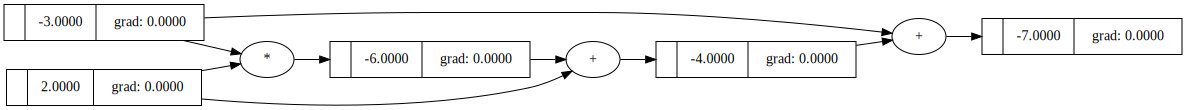

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a*b, a+b
c = a*b+a+b; c

Good I would also live to ignore warning here

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can suppress that warning by importing warnings and filtering it:

```python
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython.core.formatters')
```

Try adding this at the top of your notebook. That should hide the FormatterWarning messages.

In [ ]:
#| export
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython.core.formatters')

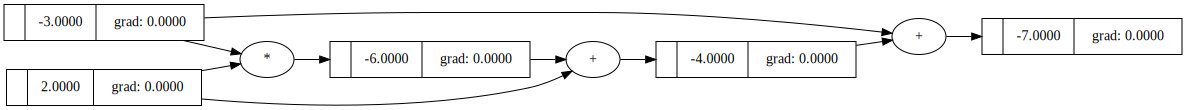

In [ ]:
c